In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import numpy as np
import datetime as dt
from datetime import timedelta

from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt, SimpleExpSmoothing, ExponentialSmoothing
from fbprophet import Prophet
from pmdarima.arima import AutoARIMA as auto_arima
from sklearn.metrics import mean_absolute_error as mae

import itertools

import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
file_name = 'INPC.csv'

In [3]:
df = pd.read_csv(file_name)
df.head(5)

,Titulo,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
0,1Q Ene 2000,44.809270,48.801160,47.992069,37.727428,57.714886,48.973221,54.657941,31.650998,49.893290,33.976642,35.866554,36.467270,35.452439,32.448903,29.242029,38.993265
1,2Q Ene 2000,45.052246,49.137179,48.277051,38.012195,57.984337,49.365962,55.004133,32.152531,50.294516,34.017754,35.446799,35.396890,35.447264,32.857007,29.207867,40.157381
2,1Q Feb 2000,45.272547,49.413209,48.553767,38.232714,58.313512,49.636536,55.306788,32.183850,50.614271,34.112554,35.336707,34.626218,35.757818,33.114912,29.572935,40.244958
3,2Q Feb 2000,45.386070,49.602727,48.749021,38.400363,58.531245,49.815878,55.477939,32.201694,50.852112,34.066644,35.145576,33.992757,35.848459,33.184681,29.592888,40.400738
4,1Q Mar 2000,45.530449,49.756948,48.927099,38.531625,58.755930,49.938378,55.619771,32.204424,50.996362,34.181999,35.025131,33.443734,36.000967,33.487743,30.001675,40.537508


In [4]:
df.replace(' ', '-', regex=True, inplace=True)
df

,Titulo,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
0,1Q-Ene-2000,44.809270,48.801160,47.992069,37.727428,57.714886,48.973221,54.657941,31.650998,49.893290,33.976642,35.866554,36.467270,35.452439,32.448903,29.242029,38.993265
1,2Q-Ene-2000,45.052246,49.137179,48.277051,38.012195,57.984337,49.365962,55.004133,32.152531,50.294516,34.017754,35.446799,35.396890,35.447264,32.857007,29.207867,40.157381
2,1Q-Feb-2000,45.272547,49.413209,48.553767,38.232714,58.313512,49.636536,55.306788,32.183850,50.614271,34.112554,35.336707,34.626218,35.757818,33.114912,29.572935,40.244958
3,2Q-Feb-2000,45.386070,49.602727,48.749021,38.400363,58.531245,49.815878,55.477939,32.201694,50.852112,34.066644,35.145576,33.992757,35.848459,33.184681,29.592888,40.400738
4,1Q-Mar-2000,45.530449,49.756948,48.927099,38.531625,58.755930,49.938378,55.619771,32.204424,50.996362,34.181999,35.025131,33.443734,36.000967,33.487743,30.001675,40.537508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2Q-Oct-2020,108.862000,108.771418,110.555087,113.056909,107.932728,106.845602,105.678454,110.691993,107.090936,109.143718,115.320680,122.080105,109.830041,104.708227,102.681476,109.445313
500,1Q-Nov-2020,108.910000,108.655288,110.228762,113.128905,107.188890,106.956420,105.741024,110.691993,107.268432,109.696268,114.237916,118.070287,111.124905,106.435047,105.131984,109.480673
501,2Q-Nov-2020,108.801000,108.628374,110.124419,113.287737,106.808693,107.013106,105.833298,110.691993,107.304940,109.335673,113.837193,115.780811,112.258404,106.103267,104.683119,109.422551
502,1Q-Dic-2020,109.168000,109.194891,110.977135,113.545082,108.285463,107.270616,105.908217,110.691993,107.780872,109.083505,112.606529,111.098902,113.831165,106.553727,105.330919,109.411772


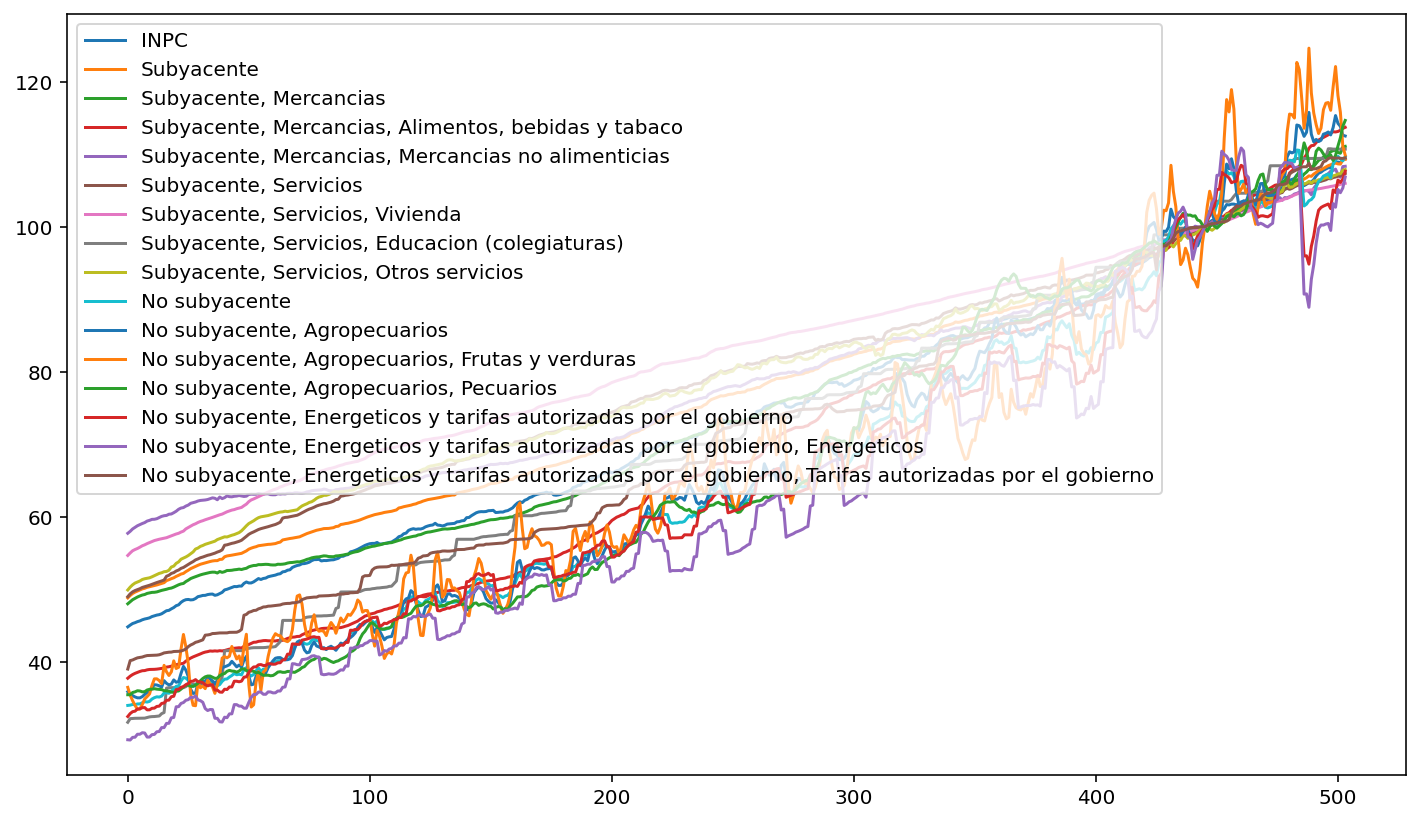

In [5]:
df.plot();

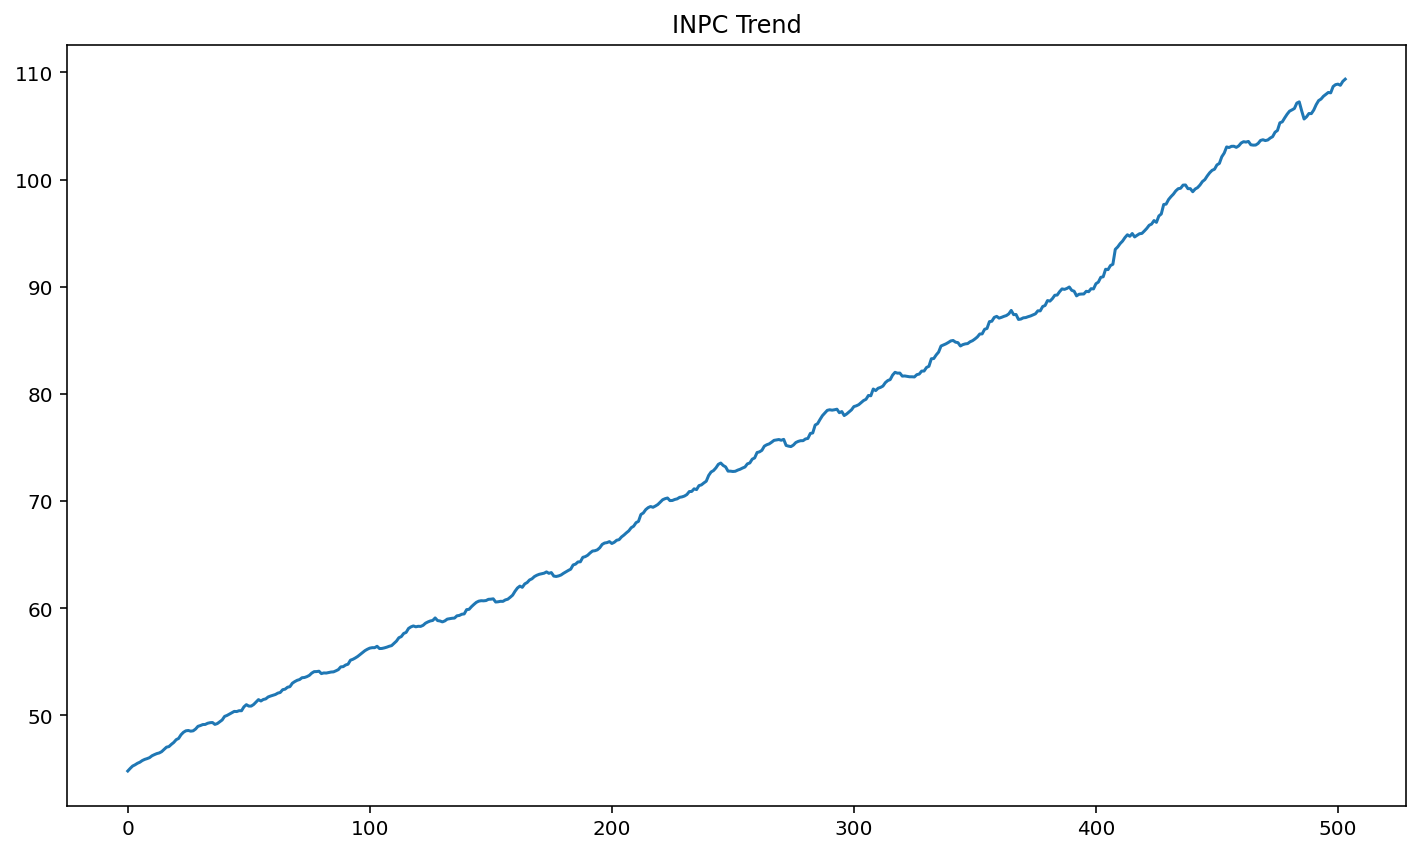

In [6]:
df.INPC.plot(title="INPC Trend");

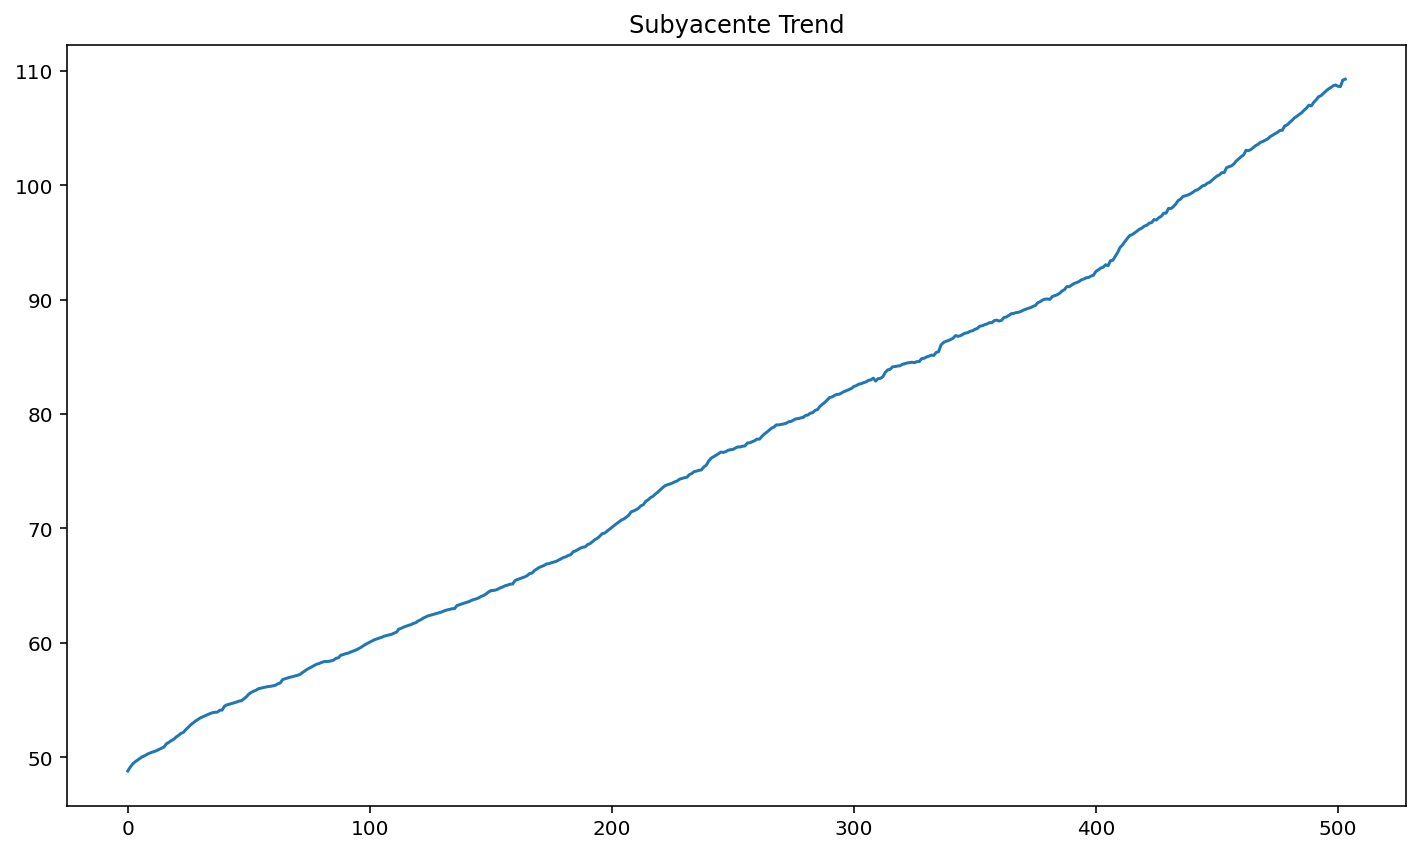

In [7]:
df.Subyacente.plot(title="Subyacente Trend");

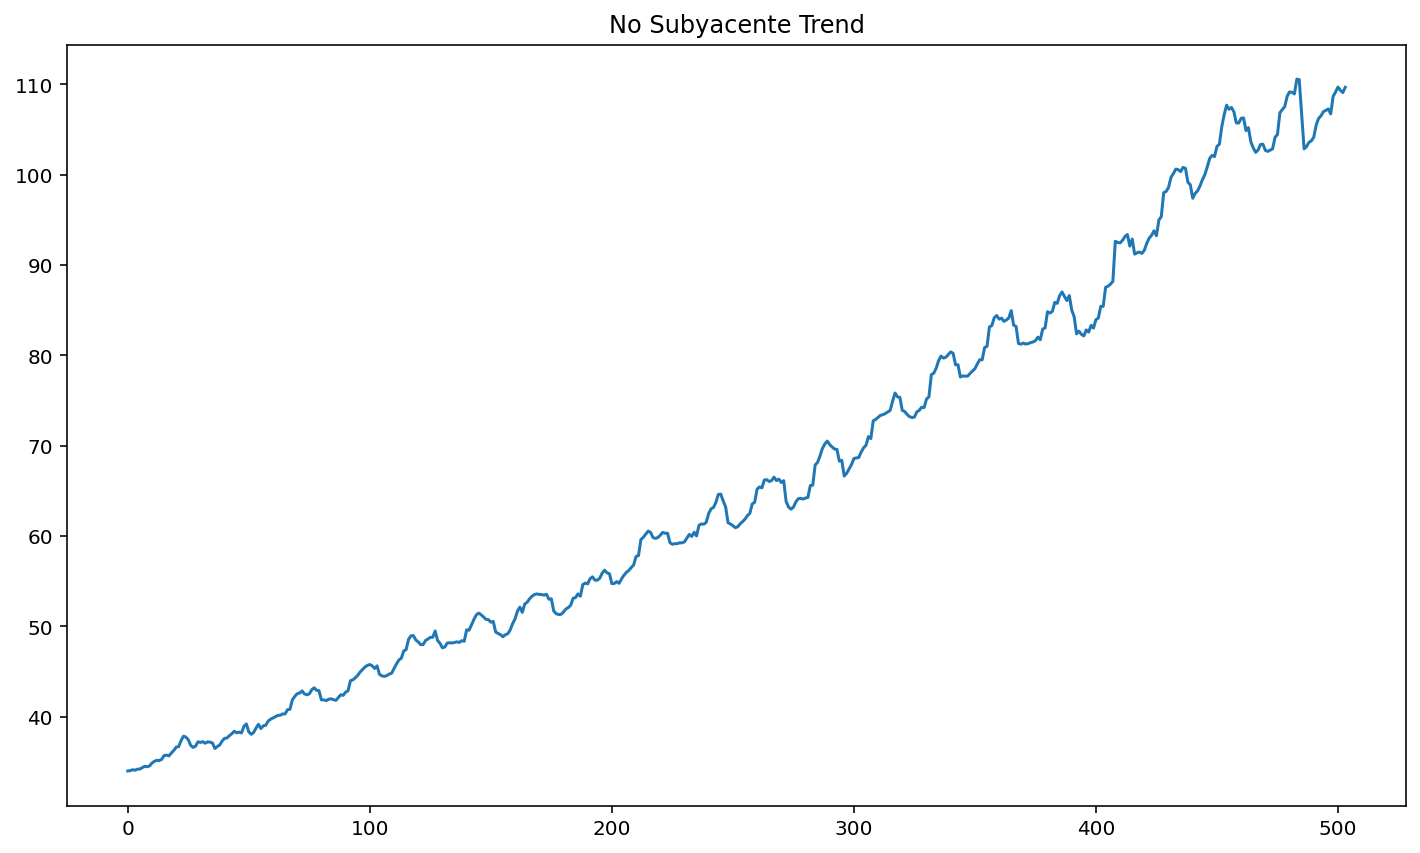

In [8]:
df['No subyacente'].plot(title="No Subyacente Trend");

In [9]:
df.tail()

,Titulo,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
499,2Q-Oct-2020,108.862,108.771418,110.555087,113.056909,107.932728,106.845602,105.678454,110.691993,107.090936,109.143718,115.320680,122.080105,109.830041,104.708227,102.681476,109.445313
500,1Q-Nov-2020,108.910,108.655288,110.228762,113.128905,107.188890,106.956420,105.741024,110.691993,107.268432,109.696268,114.237916,118.070287,111.124905,106.435047,105.131984,109.480673
501,2Q-Nov-2020,108.801,108.628374,110.124419,113.287737,106.808693,107.013106,105.833298,110.691993,107.304940,109.335673,113.837193,115.780811,112.258404,106.103267,104.683119,109.422551
502,1Q-Dic-2020,109.168,109.194891,110.977135,113.545082,108.285463,107.270616,105.908217,110.691993,107.780872,109.083505,112.606529,111.098902,113.831165,106.553727,105.330919,109.411772
503,2Q-Dic-2020,109.374,109.278530,111.072971,113.696258,108.323295,107.341085,105.970395,110.691993,107.873575,109.669671,112.502304,109.861145,114.647701,107.635643,106.845912,109.481464


In [10]:
df.dtypes

Titulo                                                                                                    object
INPC                                                                                                     float64
Subyacente                                                                                               float64
Subyacente, Mercancias                                                                                   float64
Subyacente, Mercancias, Alimentos, bebidas y tabaco                                                      float64
Subyacente, Mercancias, Mercancias no alimenticias                                                       float64
Subyacente, Servicios                                                                                    float64
Subyacente, Servicios, Vivienda                                                                          float64
Subyacente, Servicios, Educacion (colegiaturas)                                                 

In [11]:
df.replace('Q', '', regex=True, inplace=True)
df.replace('2-', '16-', regex=True, inplace=True)
df.replace('Ene', '1', regex=True, inplace=True)
df.replace('Feb', '2', regex=True, inplace=True)
df.replace('Mar', '3', regex=True, inplace=True)
df.replace('Abr', '4', regex=True, inplace=True)
df.replace('May', '5', regex=True, inplace=True)
df.replace('Jun', '6', regex=True, inplace=True)
df.replace('Jul', '7', regex=True, inplace=True)
df.replace('Ago', '8', regex=True, inplace=True)
df.replace('Sep', '9', regex=True, inplace=True)
df.replace('Oct', '10', regex=True, inplace=True)
df.replace('Nov', '11', regex=True, inplace=True)
df.replace('Dic', '12', regex=True, inplace=True)
df

,Titulo,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
0,1-1-2000,44.809270,48.801160,47.992069,37.727428,57.714886,48.973221,54.657941,31.650998,49.893290,33.976642,35.866554,36.467270,35.452439,32.448903,29.242029,38.993265
1,16-1-2000,45.052246,49.137179,48.277051,38.012195,57.984337,49.365962,55.004133,32.152531,50.294516,34.017754,35.446799,35.396890,35.447264,32.857007,29.207867,40.157381
2,1-2-2000,45.272547,49.413209,48.553767,38.232714,58.313512,49.636536,55.306788,32.183850,50.614271,34.112554,35.336707,34.626218,35.757818,33.114912,29.572935,40.244958
3,16-2-2000,45.386070,49.602727,48.749021,38.400363,58.531245,49.815878,55.477939,32.201694,50.852112,34.066644,35.145576,33.992757,35.848459,33.184681,29.592888,40.400738
4,1-3-2000,45.530449,49.756948,48.927099,38.531625,58.755930,49.938378,55.619771,32.204424,50.996362,34.181999,35.025131,33.443734,36.000967,33.487743,30.001675,40.537508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,16-10-2020,108.862000,108.771418,110.555087,113.056909,107.932728,106.845602,105.678454,110.691993,107.090936,109.143718,115.320680,122.080105,109.830041,104.708227,102.681476,109.445313
500,1-11-2020,108.910000,108.655288,110.228762,113.128905,107.188890,106.956420,105.741024,110.691993,107.268432,109.696268,114.237916,118.070287,111.124905,106.435047,105.131984,109.480673
501,16-11-2020,108.801000,108.628374,110.124419,113.287737,106.808693,107.013106,105.833298,110.691993,107.304940,109.335673,113.837193,115.780811,112.258404,106.103267,104.683119,109.422551
502,1-12-2020,109.168000,109.194891,110.977135,113.545082,108.285463,107.270616,105.908217,110.691993,107.780872,109.083505,112.606529,111.098902,113.831165,106.553727,105.330919,109.411772


In [12]:
df['Titulo'] = pd.to_datetime(df.Titulo, format="%d-%m-%Y")
df.rename(columns={'Titulo': 'Fecha'}, inplace=True)
df

,Fecha,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
0,2000-01-01,44.809270,48.801160,47.992069,37.727428,57.714886,48.973221,54.657941,31.650998,49.893290,33.976642,35.866554,36.467270,35.452439,32.448903,29.242029,38.993265
1,2000-01-16,45.052246,49.137179,48.277051,38.012195,57.984337,49.365962,55.004133,32.152531,50.294516,34.017754,35.446799,35.396890,35.447264,32.857007,29.207867,40.157381
2,2000-02-01,45.272547,49.413209,48.553767,38.232714,58.313512,49.636536,55.306788,32.183850,50.614271,34.112554,35.336707,34.626218,35.757818,33.114912,29.572935,40.244958
3,2000-02-16,45.386070,49.602727,48.749021,38.400363,58.531245,49.815878,55.477939,32.201694,50.852112,34.066644,35.145576,33.992757,35.848459,33.184681,29.592888,40.400738
4,2000-03-01,45.530449,49.756948,48.927099,38.531625,58.755930,49.938378,55.619771,32.204424,50.996362,34.181999,35.025131,33.443734,36.000967,33.487743,30.001675,40.537508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2020-10-16,108.862000,108.771418,110.555087,113.056909,107.932728,106.845602,105.678454,110.691993,107.090936,109.143718,115.320680,122.080105,109.830041,104.708227,102.681476,109.445313
500,2020-11-01,108.910000,108.655288,110.228762,113.128905,107.188890,106.956420,105.741024,110.691993,107.268432,109.696268,114.237916,118.070287,111.124905,106.435047,105.131984,109.480673
501,2020-11-16,108.801000,108.628374,110.124419,113.287737,106.808693,107.013106,105.833298,110.691993,107.304940,109.335673,113.837193,115.780811,112.258404,106.103267,104.683119,109.422551
502,2020-12-01,109.168000,109.194891,110.977135,113.545082,108.285463,107.270616,105.908217,110.691993,107.780872,109.083505,112.606529,111.098902,113.831165,106.553727,105.330919,109.411772


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 17 columns):
 #   Column                                                                                                 Non-Null Count  Dtype         
---  ------                                                                                                 --------------  -----         
 0   Fecha                                                                                                  504 non-null    datetime64[ns]
 1   INPC                                                                                                   504 non-null    float64       
 2   Subyacente                                                                                             504 non-null    float64       
 3   Subyacente, Mercancias                                                                                 504 non-null    float64       
 4   Subyacente, Mercancias, Alimentos, bebidas y tabaco     

In [14]:
df.set_index('Fecha', inplace=True)
df = df.resample('SMS').sum()
df

,INPC,Subyacente,"Subyacente, Mercancias","Subyacente, Mercancias, Alimentos, bebidas y tabaco","Subyacente, Mercancias, Mercancias no alimenticias","Subyacente, Servicios","Subyacente, Servicios, Vivienda","Subyacente, Servicios, Educacion (colegiaturas)","Subyacente, Servicios, Otros servicios",No subyacente,"No subyacente, Agropecuarios","No subyacente, Agropecuarios, Frutas y verduras","No subyacente, Agropecuarios, Pecuarios","No subyacente, Energeticos y tarifas autorizadas por el gobierno","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Energeticos","No subyacente, Energeticos y tarifas autorizadas por el gobierno, Tarifas autorizadas por el gobierno"
Fecha,,,,,,,,,,,,,,,,
2000-01-01,44.809270,48.801160,47.992069,37.727428,57.714886,48.973221,54.657941,31.650998,49.893290,33.976642,35.866554,36.467270,35.452439,32.448903,29.242029,38.993265
2000-01-15,45.052246,49.137179,48.277051,38.012195,57.984337,49.365962,55.004133,32.152531,50.294516,34.017754,35.446799,35.396890,35.447264,32.857007,29.207867,40.157381
2000-02-01,45.272547,49.413209,48.553767,38.232714,58.313512,49.636536,55.306788,32.183850,50.614271,34.112554,35.336707,34.626218,35.757818,33.114912,29.572935,40.244958
2000-02-15,45.386070,49.602727,48.749021,38.400363,58.531245,49.815878,55.477939,32.201694,50.852112,34.066644,35.145576,33.992757,35.848459,33.184681,29.592888,40.400738
2000-03-01,45.530449,49.756948,48.927099,38.531625,58.755930,49.938378,55.619771,32.204424,50.996362,34.181999,35.025131,33.443734,36.000967,33.487743,30.001675,40.537508
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,108.862000,108.771418,110.555087,113.056909,107.932728,106.845602,105.678454,110.691993,107.090936,109.143718,115.320680,122.080105,109.830041,104.708227,102.681476,109.445313
2020-11-01,108.910000,108.655288,110.228762,113.128905,107.188890,106.956420,105.741024,110.691993,107.268432,109.696268,114.237916,118.070287,111.124905,106.435047,105.131984,109.480673
2020-11-15,108.801000,108.628374,110.124419,113.287737,106.808693,107.013106,105.833298,110.691993,107.304940,109.335673,113.837193,115.780811,112.258404,106.103267,104.683119,109.422551


### INPC time series decomposition

In [15]:
df.index

DatetimeIndex(['2000-01-01', '2000-01-15', '2000-02-01', '2000-02-15',
               '2000-03-01', '2000-03-15', '2000-04-01', '2000-04-15',
               '2000-05-01', '2000-05-15',
               ...
               '2020-08-01', '2020-08-15', '2020-09-01', '2020-09-15',
               '2020-10-01', '2020-10-15', '2020-11-01', '2020-11-15',
               '2020-12-01', '2020-12-15'],
              dtype='datetime64[ns]', name='Fecha', length=504, freq='SMS-15')

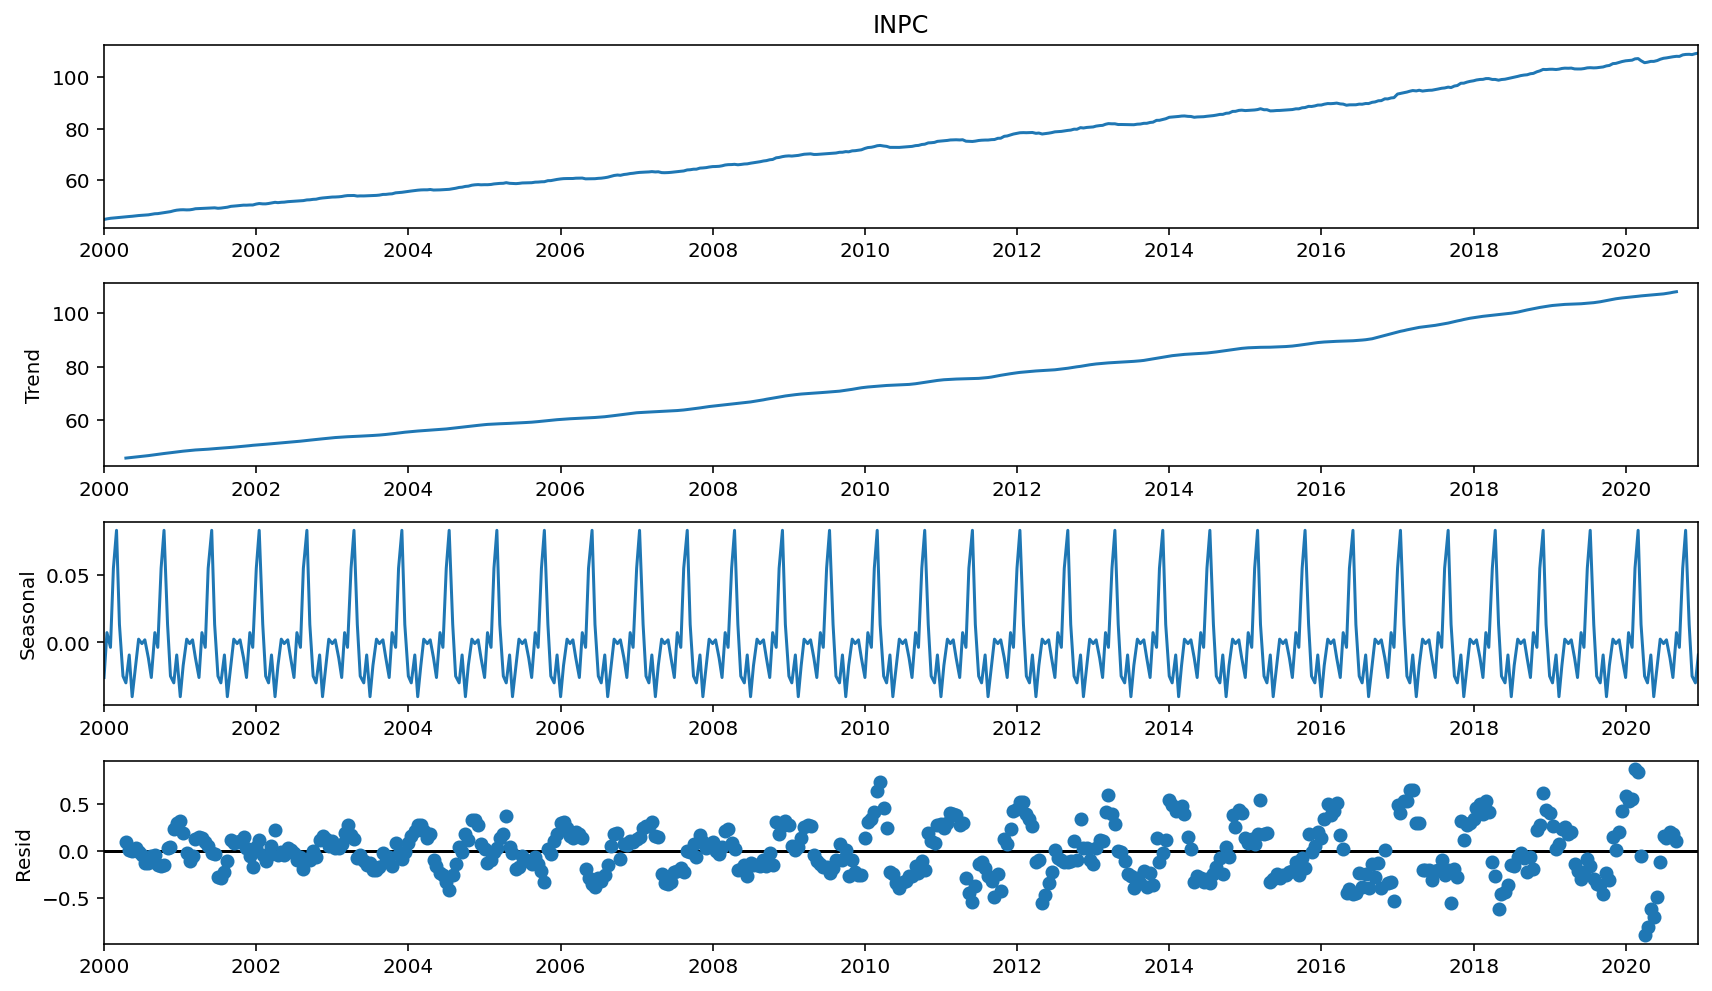

In [16]:
inpc_decomposition = sm.tsa.seasonal_decompose(df.INPC, model='additive', period=15)
inpc_decomposition.plot();

### Holt Linear

In [17]:
model_scores = []

In [18]:
df_2021 = pd.read_csv('INPC_2021.csv')
df_2021.replace(' ', '-', regex=True, inplace=True)
df_2021.replace('Q', '', regex=True, inplace=True)
df_2021.replace('2-', '16-', regex=True, inplace=True)
df_2021.replace('Ene', '1', regex=True, inplace=True)
df_2021.replace('Feb', '2', regex=True, inplace=True)
df_2021.replace('Mar', '3', regex=True, inplace=True)
df_2021.replace('Abr', '4', regex=True, inplace=True)
df_2021.replace('May', '5', regex=True, inplace=True)
df_2021.replace('Jun', '6', regex=True, inplace=True)
df_2021.replace('Jul', '7', regex=True, inplace=True)
df_2021.replace('Ago', '8', regex=True, inplace=True)
df_2021.replace('Sep', '9', regex=True, inplace=True)
df_2021.replace('Oct', '10', regex=True, inplace=True)
df_2021.replace('Nov', '11', regex=True, inplace=True)
df_2021.replace('Dic', '12', regex=True, inplace=True)
df_2021['Fecha'] = pd.to_datetime(df_2021.Fecha, format="%d-%m-%Y")
df_2021.set_index('Fecha', inplace=True)
df_2021 = df_2021.resample('SMS').sum()
df_2021 = df_2021[['INPC']]
df_2021

,INPC
Fecha,
2021-01-01,109.936
2021-01-15,110.484
2021-02-01,110.736
2021-02-15,111.079
2021-03-01,111.668
2021-03-15,111.981
2021-04-01,112.052
2021-04-15,112.328
2021-05-01,112.321


In [19]:
holt = Holt(df.INPC).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/holtwinters/model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [20]:
df_2021['holt'] = holt.forecast(15)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


In [21]:
df_2021['holt']

Fecha
2021-01-01    109.520004
2021-01-15    109.666008
2021-02-01    109.812012
2021-02-15    109.958016
2021-03-01    110.104020
2021-03-15    110.250024
2021-04-01    110.396028
2021-04-15    110.542032
2021-05-01    110.688036
2021-05-15    110.834040
2021-06-01    110.980044
2021-06-15    111.126048
2021-07-01    111.272052
2021-07-15    111.418056
2021-08-01    111.564060
Freq: SMS-15, Name: holt, dtype: float64

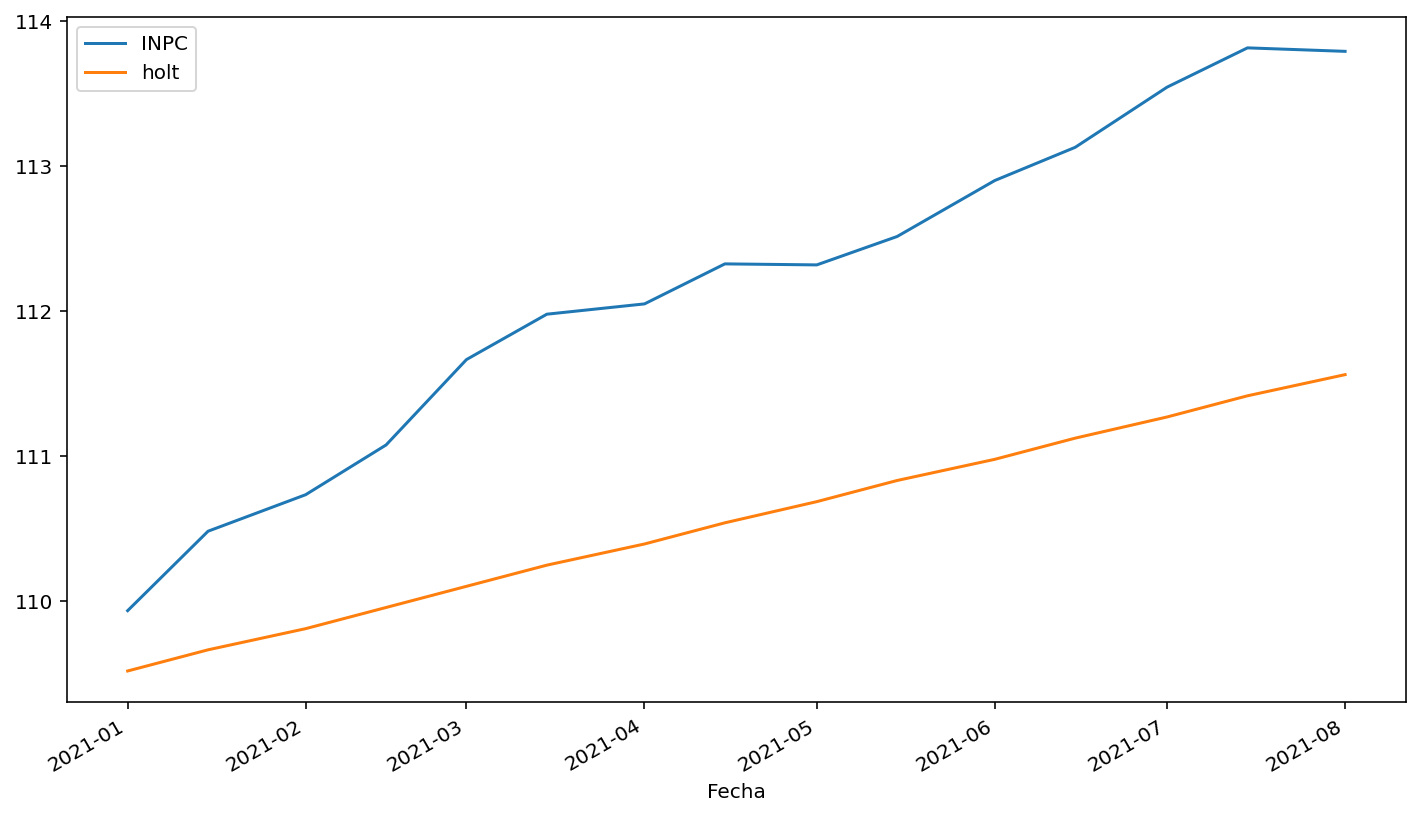

In [22]:
# y.plot(legend="INPC Predicted");
df_2021.plot();

In [23]:
# mae(actual, pred)
holt_linear_mae = mae(df_2021.INPC, df_2021.holt)
print("Mean Absolute Error for Holt Linear Model:", holt_linear_mae)

Mean Absolute Error for Holt Linear Model: 1.6110345185971027


### AR MODEL

In [24]:
model_ar = auto_arima(trace=True, error_action='ignore', start_p=0, start_q=0,max_p=4,max_q=0, suppress_warnings=True,stepwise=False,seasonal=False)
model_ar.fit(df.INPC)

Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-202.661, BIC=-194.220, Time=0.049 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-207.420, BIC=-194.758, Time=0.058 seconds


Fit ARIMA(2,1,0)x(0,0,0,0) [intercept=True]; AIC=-266.039, BIC=-249.156, Time=0.192 seconds


Fit ARIMA(3,1,0)x(0,0,0,0) [intercept=True]; AIC=-268.241, BIC=-247.138, Time=0.402 seconds


Fit ARIMA(4,1,0)x(0,0,0,0) [intercept=True]; AIC=-269.951, BIC=-244.627, Time=2.206 seconds
Total fit time: 2.912 seconds


AutoARIMA(error_action='ignore', max_p=4, max_q=0, seasonal=False, start_p=0,
          start_q=0, stepwise=False, suppress_warnings=True, trace=True)

In [25]:
prediction_ar = model_ar.predict(len(df_2021))
df_2021['ar_model'] = prediction_ar
df_2021

,INPC,holt,ar_model
Fecha,,,
2021-01-01,109.936,109.520004,109.603655
2021-01-15,110.484,109.666008,109.724099
2021-02-01,110.736,109.812012,109.896376
2021-02-15,111.079,109.958016,110.024129
2021-03-01,111.668,110.104020,110.176043
2021-03-15,111.981,110.250024,110.302173
2021-04-01,112.052,110.396028,110.441844
2021-04-15,112.328,110.542032,110.568725
2021-05-01,112.321,110.688036,110.703051


In [26]:
ar_mae = mae(df_2021.INPC, df_2021.ar_model)
print("Mean Absolute Error for AR Model:", ar_mae)

Mean Absolute Error for AR Model: 1.5949529410878105


### SARIMA MODEL

In [27]:
model_sarima = auto_arima(trace=True, error_action='ignore',start_p=0,start_q=0,max_p=2,max_q=2,m=7,suppress_warnings=True,stepwise=True,seasonal=True)
model_sarima.fit(df.INPC)

Performing stepwise search to minimize aic


Fit ARIMA(0,1,0)x(1,0,1,7) [intercept=True]; AIC=-213.845, BIC=-196.963, Time=2.302 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=True]; AIC=-202.661, BIC=-194.220, Time=0.125 seconds


Fit ARIMA(1,1,0)x(1,0,0,7) [intercept=True]; AIC=-207.125, BIC=-190.243, Time=1.973 seconds


Fit ARIMA(0,1,1)x(0,0,1,7) [intercept=True]; AIC=-206.734, BIC=-189.852, Time=1.599 seconds
Fit ARIMA(0,1,0)x(0,0,0,7) [intercept=False]; AIC=-26.729, BIC=-22.509, Time=0.106 seconds


Fit ARIMA(0,1,0)x(0,0,1,7) [intercept=True]; AIC=-205.273, BIC=-192.611, Time=0.810 seconds


Fit ARIMA(0,1,0)x(1,0,0,7) [intercept=True]; AIC=-202.984, BIC=-190.322, Time=0.993 seconds


Fit ARIMA(0,1,0)x(2,0,1,7) [intercept=True]; AIC=-232.075, BIC=-210.972, Time=9.382 seconds


Fit ARIMA(0,1,0)x(2,0,0,7) [intercept=True]; AIC=-233.460, BIC=-216.578, Time=3.019 seconds


Fit ARIMA(1,1,0)x(2,0,0,7) [intercept=True]; AIC=-239.426, BIC=-218.323, Time=4.000 seconds


Fit ARIMA(1,1,0)x(2,0,1,7) [intercept=True]; AIC=-242.242, BIC=-216.919, Time=8.397 seconds


Fit ARIMA(1,1,0)x(1,0,1,7) [intercept=True]; AIC=-221.041, BIC=-199.939, Time=7.780 seconds


Fit ARIMA(1,1,0)x(2,0,2,7) [intercept=True]; AIC=-317.604, BIC=-288.060, Time=13.102 seconds
Near non-invertible roots for order (1, 1, 0)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.996)


Fit ARIMA(1,1,0)x(1,0,2,7) [intercept=True]; AIC=-233.983, BIC=-208.659, Time=8.304 seconds


Fit ARIMA(2,1,0)x(2,0,1,7) [intercept=True]; AIC=-272.742, BIC=-243.198, Time=10.701 seconds


Fit ARIMA(2,1,0)x(1,0,1,7) [intercept=True]; AIC=-268.585, BIC=-243.262, Time=8.992 seconds


Fit ARIMA(2,1,0)x(2,0,0,7) [intercept=True]; AIC=-272.433, BIC=-247.109, Time=5.518 seconds


Fit ARIMA(2,1,0)x(2,0,2,7) [intercept=True]; AIC=-323.829, BIC=-290.064, Time=16.999 seconds
Near non-invertible roots for order (2, 1, 0)(2, 0, 2, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)


Fit ARIMA(2,1,0)x(1,0,0,7) [intercept=True]; AIC=-264.659, BIC=-243.556, Time=3.480 seconds


Fit ARIMA(2,1,0)x(1,0,2,7) [intercept=True]; AIC=-271.072, BIC=-241.528, Time=14.418 seconds


Fit ARIMA(2,1,1)x(2,0,1,7) [intercept=True]; AIC=-279.140, BIC=-245.375, Time=16.199 seconds


Fit ARIMA(2,1,1)x(1,0,1,7) [intercept=True]; AIC=-273.114, BIC=-243.570, Time=9.190 seconds


Fit ARIMA(2,1,1)x(2,0,0,7) [intercept=True]; AIC=-280.267, BIC=-250.723, Time=9.008 seconds


Fit ARIMA(2,1,1)x(1,0,0,7) [intercept=True]; AIC=-269.155, BIC=-243.831, Time=3.117 seconds


Fit ARIMA(1,1,1)x(2,0,0,7) [intercept=True]; AIC=-249.482, BIC=-224.158, Time=8.692 seconds


Fit ARIMA(2,1,2)x(2,0,0,7) [intercept=True]; AIC=-278.339, BIC=-244.574, Time=14.112 seconds


Fit ARIMA(1,1,2)x(2,0,0,7) [intercept=True]; AIC=-277.994, BIC=-248.450, Time=12.685 seconds
Total fit time: 195.177 seconds


AutoARIMA(error_action='ignore', m=7, max_p=2, max_q=2, start_p=0, start_q=0,
          suppress_warnings=True, trace=True)

In [28]:
prediction_sarima=model_sarima.predict(len(df_2021))
df_2021['sarima_model'] = prediction_sarima
df_2021

,INPC,holt,ar_model,sarima_model
Fecha,,,,
2021-01-01,109.936,109.520004,109.603655,109.649162
2021-01-15,110.484,109.666008,109.724099,109.685965
2021-02-01,110.736,109.812012,109.896376,109.864315
2021-02-15,111.079,109.958016,110.024129,110.127604
2021-03-01,111.668,110.104020,110.176043,110.216747
2021-03-15,111.981,110.250024,110.302173,110.474462
2021-04-01,112.052,110.396028,110.441844,110.496723
2021-04-15,112.328,110.542032,110.568725,110.846888
2021-05-01,112.321,110.688036,110.703051,110.838565


In [29]:
sarima_mae = mae(df_2021.INPC, df_2021.sarima_model)
sarima_mae

1.4612688843575654

### Facebook Prophet

In [30]:
prophet_df = pd.DataFrame({'ds':df.index,'y':df.INPC})
prophet_model = Prophet()
prophet_model.fit(prophet_df)
predict = prophet_model.predict(pd.DataFrame({'ds':df_2021.index.to_list()}))
df_2021['Prophet'] = predict['yhat'].values

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.23578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2493.44    0.00423482       4058.84           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2535.16    0.00113909       603.522           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2548.33   0.000611681       588.247           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2553.38    0.00121707       3365.22           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2558.89   0.000183966       669.591           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [31]:
prophet_mae = mae(df_2021.INPC, df_2021.Prophet)
print("Mean Absolute Error for Prophet Model:", prophet_mae)

Mean Absolute Error for Prophet Model: 0.8979707353956191


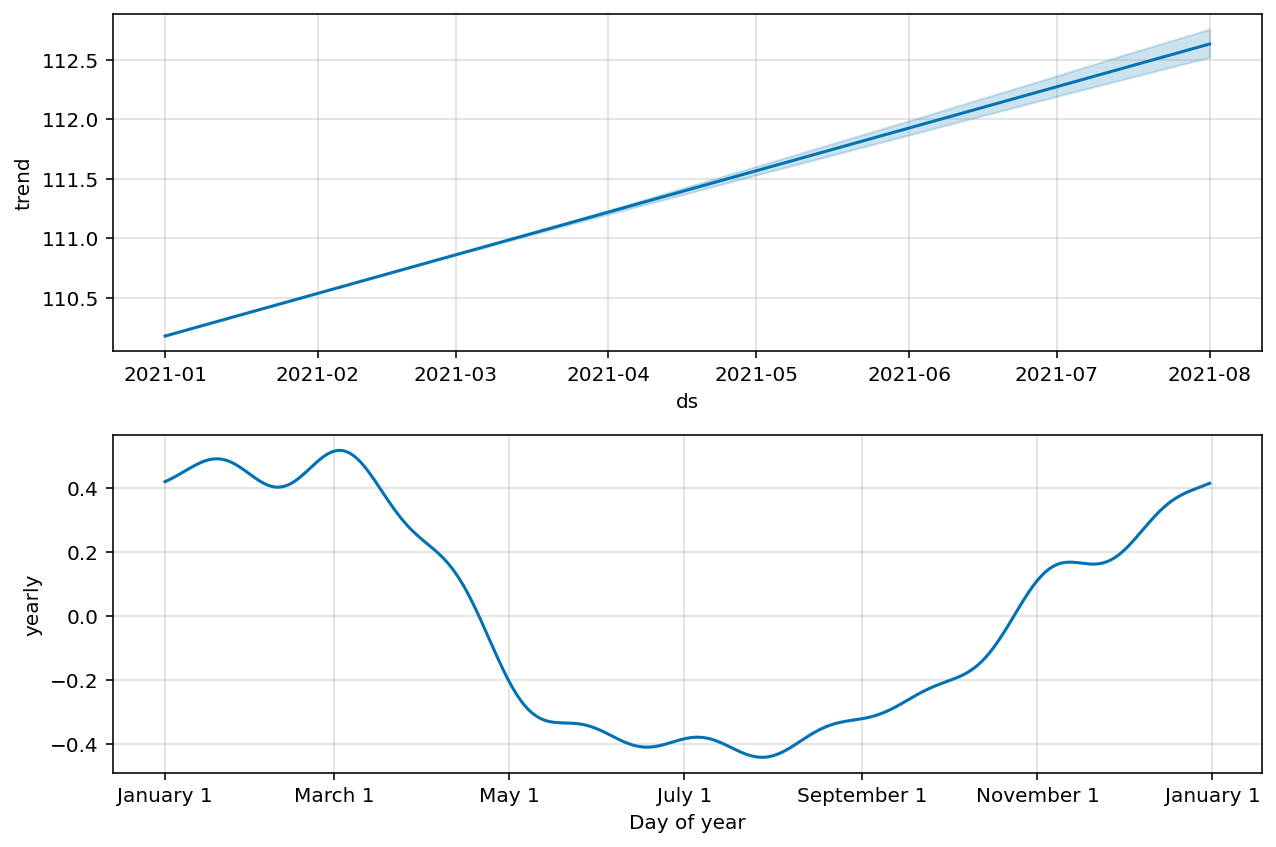

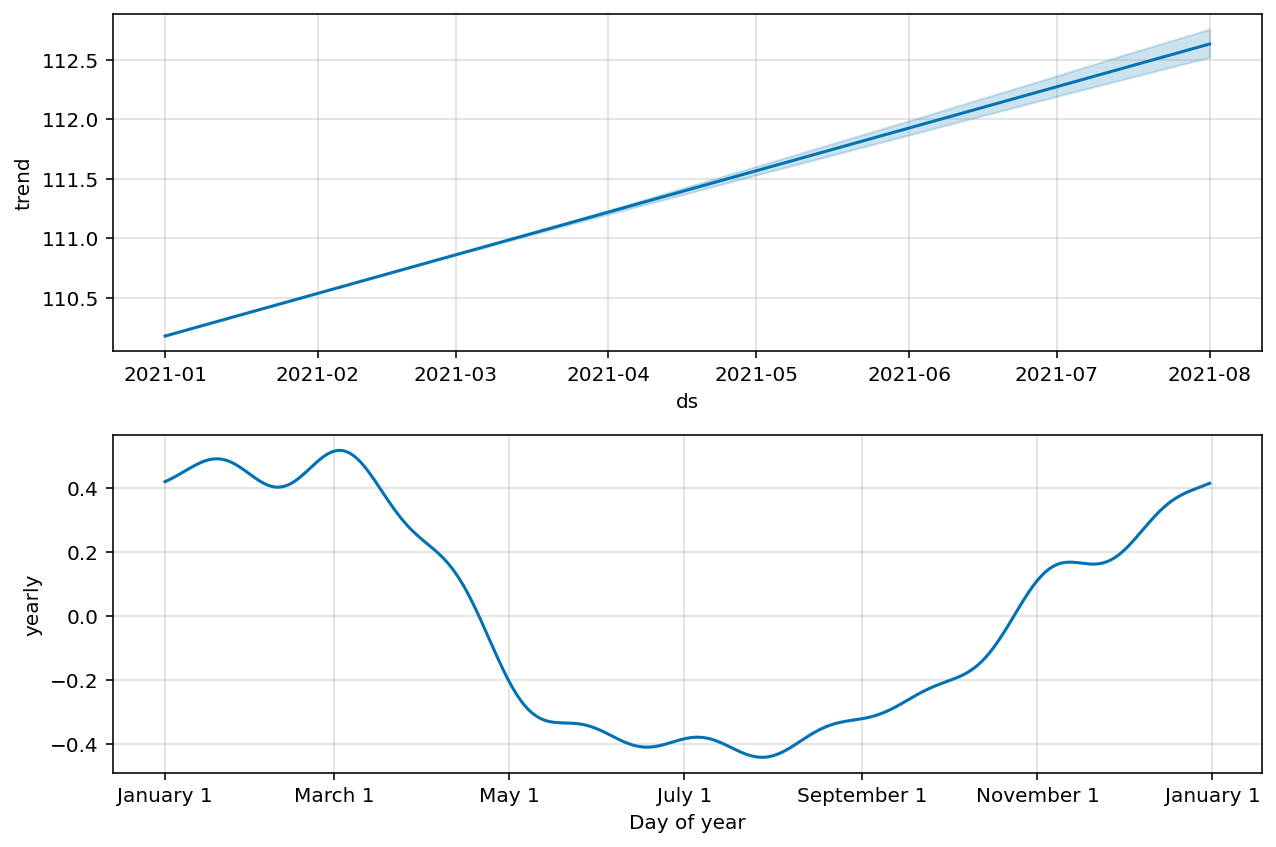

In [32]:
prophet_model.plot_components(predict)

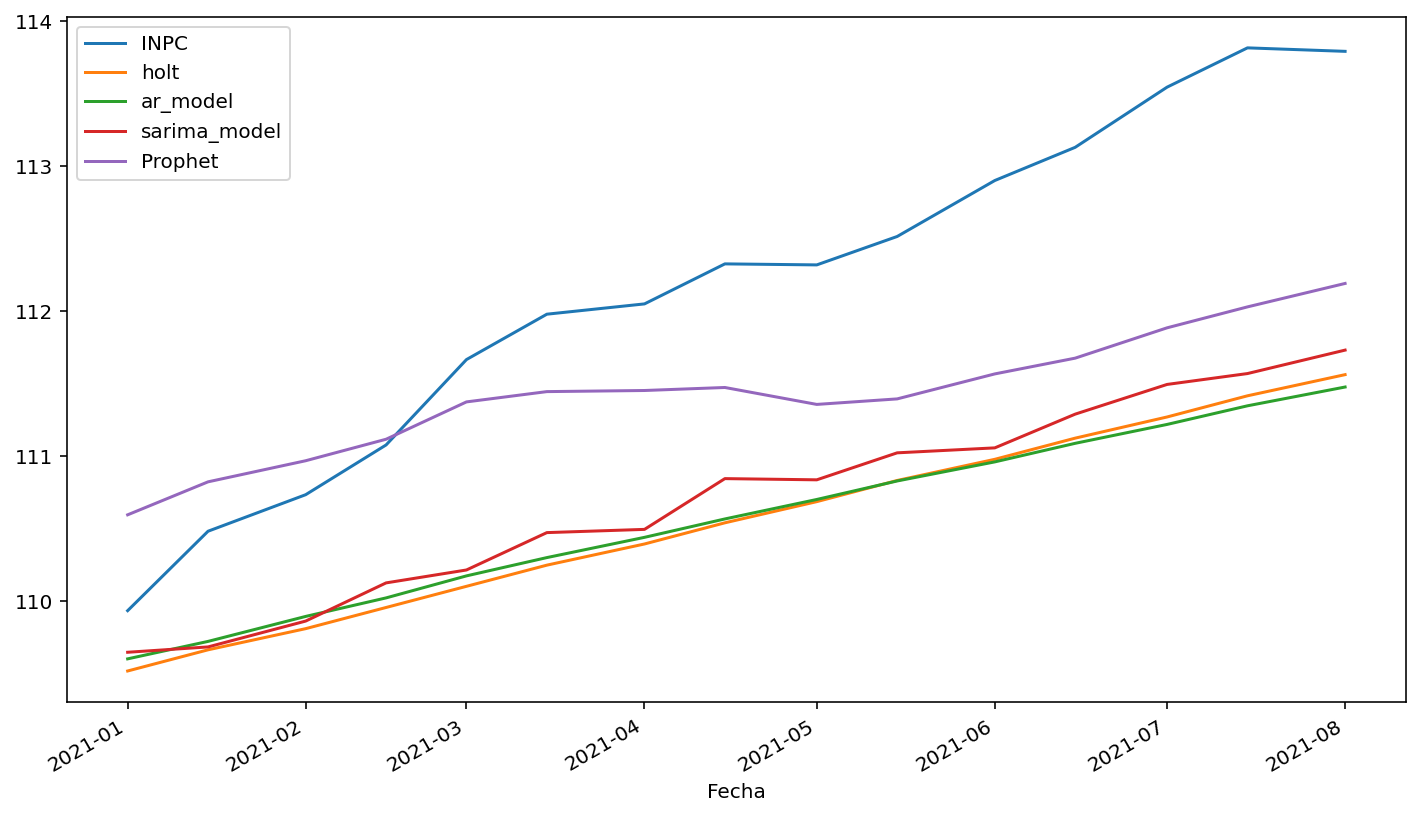

In [33]:
df_2021.plot();

### SARIMAX

In [34]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [35]:
df.INPC

Fecha
2000-01-01     44.809270
2000-01-15     45.052246
2000-02-01     45.272547
2000-02-15     45.386070
2000-03-01     45.530449
                 ...    
2020-10-15    108.862000
2020-11-01    108.910000
2020-11-15    108.801000
2020-12-01    109.168000
2020-12-15    109.374000
Freq: SMS-15, Name: INPC, Length: 504, dtype: float64

In [36]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMA(df.INPC,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [37]:
mod = sm.tsa.statespace.SARIMAX(df.INPC,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7290      0.098      7.455      0.000       0.537       0.921
ma.L1         -0.5497      0.109     -5.057      0.000      -0.763      -0.337
ma.S.L12      -1.0000     28.233     -0.035      0.972     -56.336      54.336
sigma2         0.0357      1.009      0.035      0.972      -1.942       2.013


/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


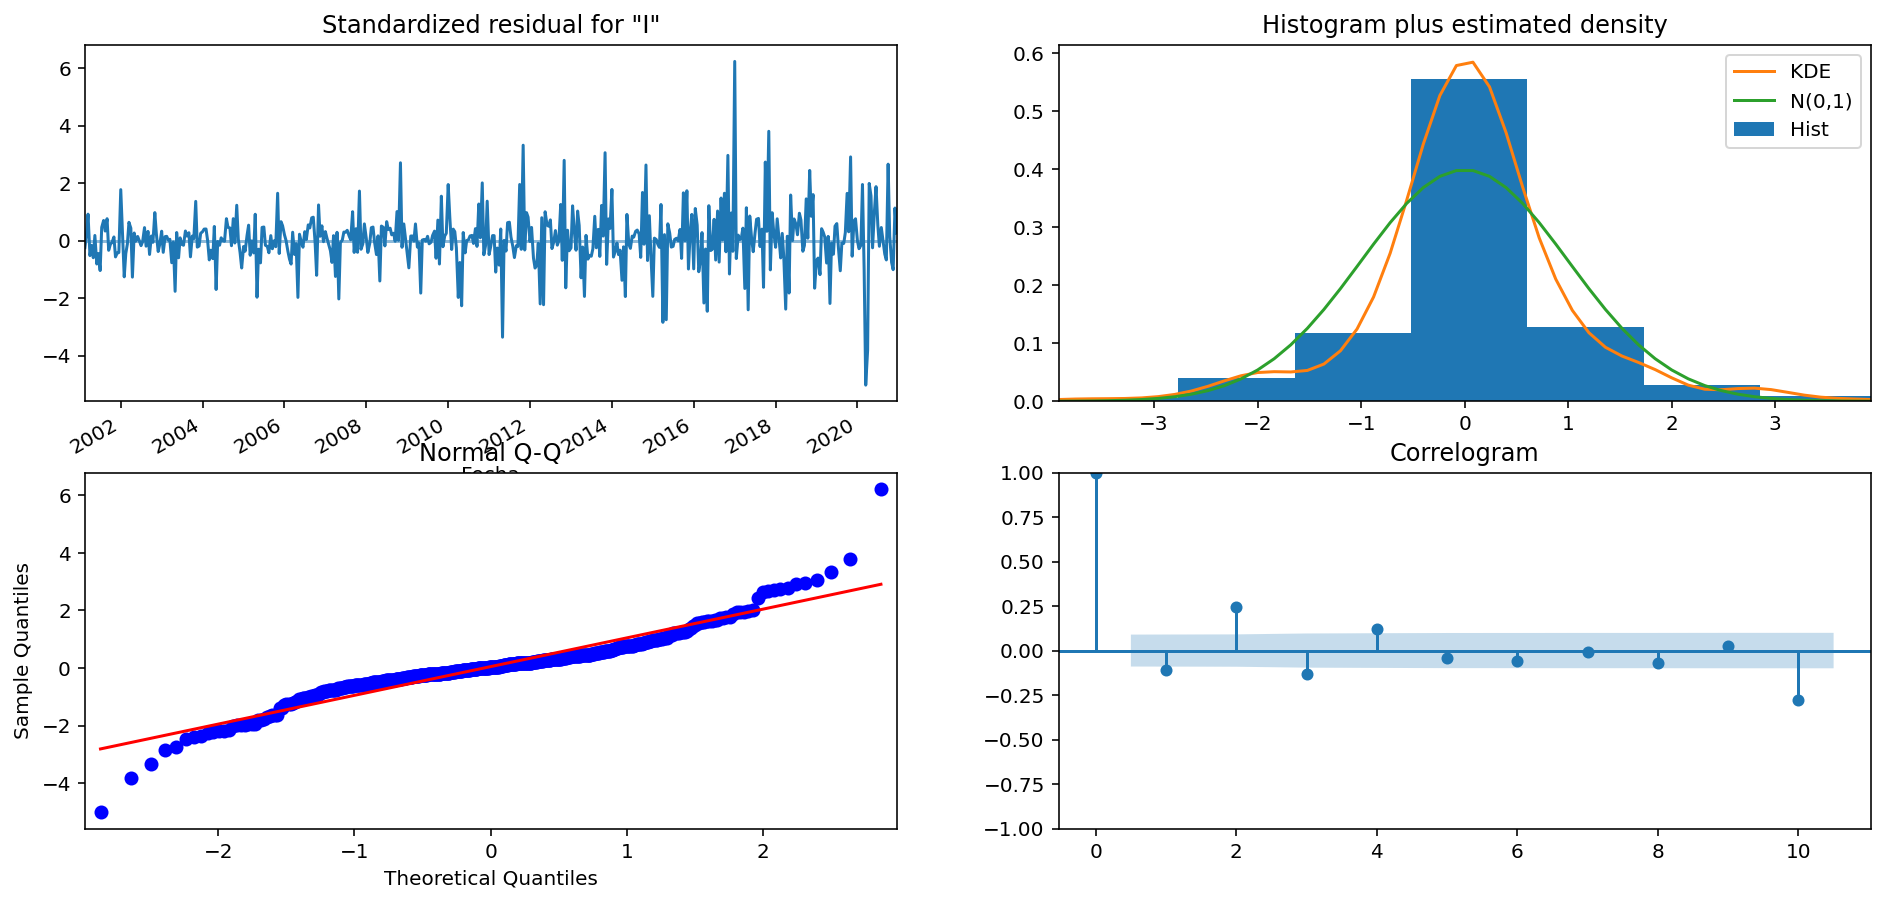

In [38]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [39]:
listPredicts = [results.get_prediction(start=pd.to_datetime(dateTime), dynamic=False).predicted_mean for dateTime in df_2021.index.to_list()]
listPredicts

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:132: FutureWarning: The 'freq' argument in Timestamp is deprecated and will be removed in a future version.
  date_key = Timestamp(key, freq=base_index.freq)


[2021-01-01    109.60613
 Freq: SMS-15, dtype: float64,
 2021-01-15    109.736187
 Freq: SMS-15, dtype: float64,
 2021-02-01    109.879073
 Freq: SMS-15, dtype: float64,
 2021-02-15    110.01154
 Freq: SMS-15, dtype: float64,
 2021-03-01    110.244786
 Freq: SMS-15, dtype: float64,
 2021-03-15    110.328579
 Freq: SMS-15, dtype: float64,
 2021-04-01    110.439
 Freq: SMS-15, dtype: float64,
 2021-04-15    110.509469
 Freq: SMS-15, dtype: float64,
 2021-05-01    110.637933
 Freq: SMS-15, dtype: float64,
 2021-05-15    110.697883
 Freq: SMS-15, dtype: float64,
 2021-06-01    110.872902
 Freq: SMS-15, dtype: float64,
 2021-06-15    111.005571
 Freq: SMS-15, dtype: float64,
 2021-07-01    111.211652
 Freq: SMS-15, dtype: float64,
 2021-07-15    111.32272
 Freq: SMS-15, dtype: float64,
 2021-08-01    111.451765
 Freq: SMS-15, dtype: float64]

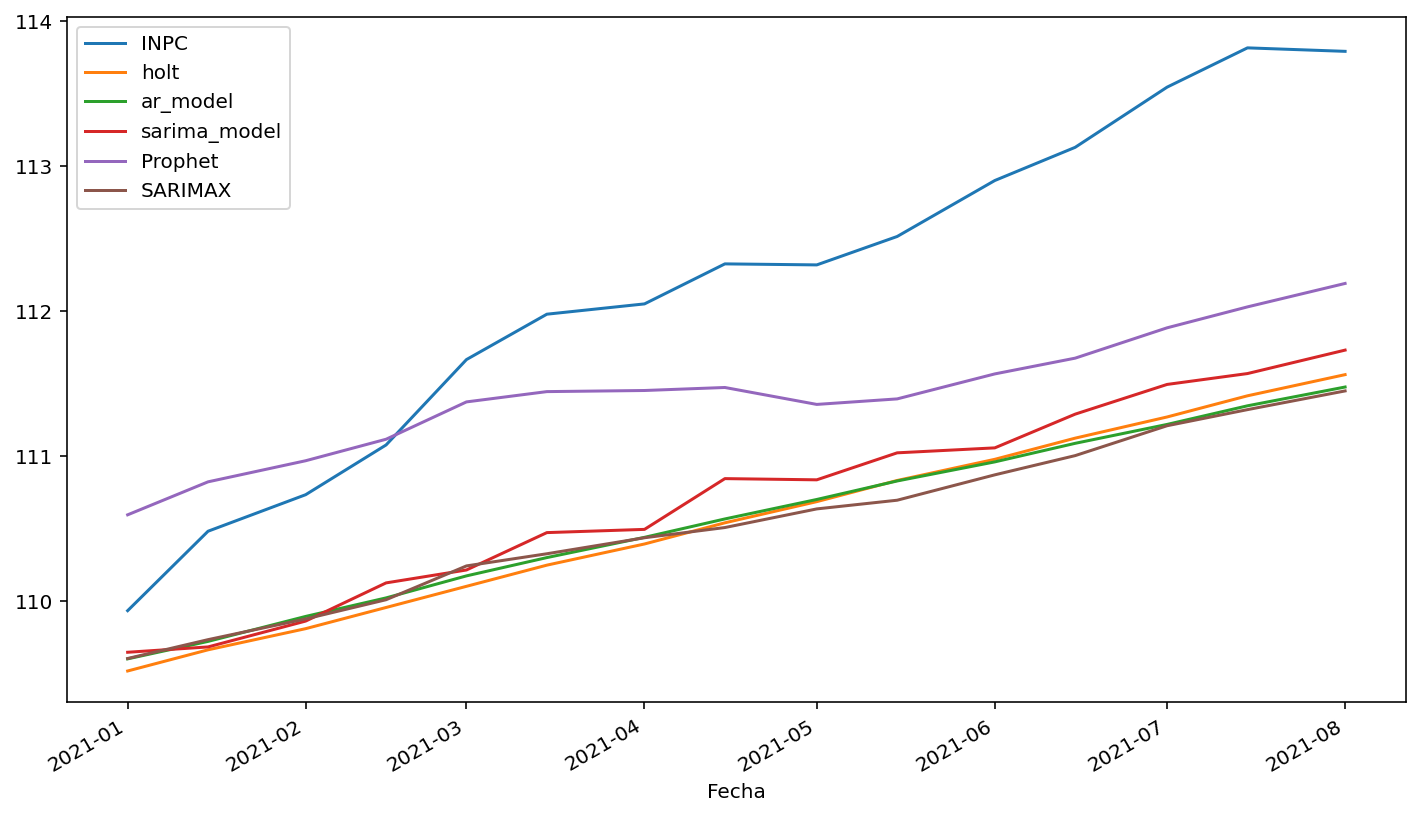

In [40]:
predic = pd.DataFrame([(x.index[0], x[0]) for x in listPredicts], columns=['Fecha','pred'])
df_2021['SARIMAX'] = predic.pred.values
df_2021.plot();

In [41]:
sarimax_mae = mae(df_2021.INPC, df_2021.SARIMAX)
print("Mean Absolute Error for SARIMAX Model:", sarimax_mae)

Mean Absolute Error for SARIMAX Model: 1.6227206120908202


## Second approach

In [42]:
df_2000_column = df[['INPC']]
for column in df.columns:
    prophet_df_column = pd.DataFrame({'ds':df.index,'y':df[column]})
    prophet_model_column = Prophet()
    prophet_model_column.fit(prophet_df_column)
    predict_column = prophet_model_column.predict(pd.DataFrame({'ds':df.index.to_list()}))
    df_2000_column[column] = predict_column['yhat'].values

# Percentages of weighted average
betas = [0.3922477, 0.2007374, 0.1915104, 0.3632957, 0.1550662, 0.0360726, 0.1721569, 0.2444566, 0.1021710, 0.0457944, 0.0563766, 0.1422856, 0.0996504, 0.0426352]
green_components = [1, 2, 4, 5, 6, 9, 10, 12, 13]
green_components_subyacentes = [1, 2, 4, 5, 6]

x_hat = df_2000_column.drop(columns=['INPC', 'Subyacente'])

acum = df_2000_column[['INPC']]
acum.INPC = 0
acum['INPC_green'] = acum.INPC
acum['Subyacente_green'] = acum.INPC

for column in green_components:
    acum.INPC_green = acum.INPC_green + betas[column]*x_hat[x_hat.columns[column]]

for column in green_components_subyacentes:
    acum.Subyacente_green = acum.Subyacente_green + betas[column]*x_hat[x_hat.columns[column]]

sum_subyacente = sum([betas[column] for column in green_components_subyacentes])
acum.Subyacente_green = acum.Subyacente_green/sum_subyacente

green_dentro_mae = mae(df.INPC, acum.INPC_green)
green_dentro_subyacente_mae = mae(df.Subyacente, acum.Subyacente_green)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.23578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2493.44    0.00423482       4058.84           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2535.16    0.00113909       603.522           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2548.33   0.000611681       588.247           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2553.38    0.00121707       3365.22           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2558.89   0.000183966       669.591           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.13369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2927.7    0.00729415       7342.57           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2999.83    0.00292797       9844.43       0.933       0.933      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3019.33   0.000421057       4933.45           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3036.97   0.000186127          2924           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3051.97   0.000283841       2843.87           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.63511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2470.95    0.00571138       15717.3      0.4323           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2644.92   0.000617536       4338.41           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2680.67    0.00997618         14944           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2694.93   0.000578813       2418.74      0.2606      0.2606      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2699.99    0.00134087       461.905           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.86361
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2433.04     0.0033883       3178.94      0.2771      0.5603      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2503.38   0.000587621       1330.02           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2520.71    0.00691107       2567.44           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2541.99    0.00323652       1844.65           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2556.92   0.000160891        606.99           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.48588
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2424.22   0.000508964       1005.54           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          2548     0.0375176       8417.62           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2593.59   0.000374625        1433.6      0.1532           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2606.74   0.000885301       1635.78           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2613.55    0.00126364       499.288           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.09576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2764.21     0.0146887       21636.3      0.3292           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2895.64    0.00115487       8645.58           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2911.38    0.00141688       5547.02      0.5271      0.5271      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2921.52   0.000521048        940.13           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2933.46   0.000603249       6249.51      0.2465      0.2465      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.12965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2726.76    0.00579216       2470.91           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2870.03    0.00331087       9497.13           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3107.04   0.000128169       2837.16           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3150.59   1.56193e-05       906.563           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3163.56    0.00119823       2081.96           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2657.6   0.000138352       1301.13           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2680.22    0.00123991       3728.21           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2688.06    0.00155931       586.039           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2691.28   9.44915e-05       213.794           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2692.51   9.08635e-06       136.864      0.3419      0.3419      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.10857
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2470.29     0.0013822       1205.06           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2571.73    0.00393422        2827.5           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2597.46    0.00277442       3238.91           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2603.25   0.000226067       314.191           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2616.1   0.000635688       367.847           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.84694
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1922.06    0.00180146       390.244       1.946      0.1946      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1925.38   0.000356792       418.781      0.5603      0.5603      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1927.13    3.9847e-05       101.401      0.7157      0.7157      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318        1927.3    0.00012373       167.013   1.192e-06       0.001      428  LS failed, Hessian reset 
     399       1927.71    0.00600649       160.437           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     404       1927.77   2.22033e-05    

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.07368
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1882.21    0.00927377       353.373           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1891.3   0.000451319       107.468      0.2943      0.2943      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1893.57    0.00683003        532.45           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       1894.59    9.8337e-05       234.551    9.95e-07       0.001      491  LS failed, Hessian reset 
     399       1894.92   5.17231e-05       69.2306      0.3057      0.3057      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     494        1896.2   2.23942e-05    

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.10306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1511.16     0.0018295       199.364      0.6497      0.6497      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1515.91    0.00209687        82.889      0.9899      0.9899      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       1516.85   0.000192227       172.066   6.622e-07       0.001      334  LS failed, Hessian reset 
     279        1517.3   0.000161607       80.2691   2.316e-06       0.001      424  LS failed, Hessian reset 
     299       1517.31   6.10067e-06       75.4698       0.646       0.646      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       1517.36   0.000141172       136.999   1.498e-06       0.001      534  LS failed, Hessian rese

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.35496
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1892.76   0.000684556       2038.99      0.2039      0.2039      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1947.93    0.00131299       183.169           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1962.34    0.00240958       2158.19     0.04395           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1982.99   0.000659195        175.55           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1988.99   0.000900131       758.308           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.73893
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       1690.89   5.61409e-05       99.3661   7.774e-07       0.001      123  LS failed, Hessian reset 
      99       1692.02   0.000676725       65.7571      0.7798      0.7798      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1692.35    0.00012963       186.016   1.022e-06       0.001      229  LS failed, Hessian reset 
     199       1693.23    0.00168446       160.784           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       1693.67   7.28404e-05        135.26   7.573e-07       0.001      396  LS failed, Hessian reset 
     295       1694.02   9.32793e-05       125.475   1.507e-06       0.001      524  LS failed, Hessian reset 
     299       1694.03   0.000197627       119.853           1   

/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.10315
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1532.92    0.00740441       113.597       1.986       0.662      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       1533.93   0.000276119       220.026   1.815e-06       0.001      240  LS failed, Hessian reset 
     199       1533.99   3.89519e-06       75.0303           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210          1534   8.07031e-05        75.568   9.955e-07       0.001      342  LS failed, Hessian reset 
     254          1534   1.23867e-07       61.5948      0.3362           1      402   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/tmp/ipykernel_4292/4142882508.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2000_column[column] = predict_column['yhat'].values
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.25337
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2099.64    0.00355745        878.46      0.2239           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2203.83     0.0053596       761.028           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2246.75    0.00451025       566.486           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2269.3    0.00270856       686.882      0.9569      0.9569      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2284.43    0.00943722       1012.15           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_4292/4142882508.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acum['INPC_green'] = acum.INPC
/tmp/ipykernel_4292/4142882508.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

In [43]:
print(green_dentro_mae, green_dentro_subyacente_mae)

0.29841303498143795 0.271678028792213


In [44]:
df_2021_column = pd.read_csv('INPC_2021.csv')
df_2021_column.replace(' ', '-', regex=True, inplace=True)
df_2021_column.replace('Q', '', regex=True, inplace=True)
df_2021_column.replace('2-', '16-', regex=True, inplace=True)
df_2021_column.replace('Ene', '1', regex=True, inplace=True)
df_2021_column.replace('Feb', '2', regex=True, inplace=True)
df_2021_column.replace('Mar', '3', regex=True, inplace=True)
df_2021_column.replace('Abr', '4', regex=True, inplace=True)
df_2021_column.replace('May', '5', regex=True, inplace=True)
df_2021_column.replace('Jun', '6', regex=True, inplace=True)
df_2021_column.replace('Jul', '7', regex=True, inplace=True)
df_2021_column.replace('Ago', '8', regex=True, inplace=True)
df_2021_column.replace('Sep', '9', regex=True, inplace=True)
df_2021_column.replace('Oct', '10', regex=True, inplace=True)
df_2021_column.replace('Nov', '11', regex=True, inplace=True)
df_2021_column.replace('Dic', '12', regex=True, inplace=True)
df_2021_column['Fecha'] = pd.to_datetime(df_2021_column.Fecha, format="%d-%m-%Y")
df_2021_column.set_index('Fecha', inplace=True)
df_2021_column = df_2021_column.resample('SMS').sum()
df_2021_subyacente = df_2021_column[['Subyacente']]
df_2021_column = df_2021_column[['INPC']]
df_2021_column

,INPC
Fecha,
2021-01-01,109.936
2021-01-15,110.484
2021-02-01,110.736
2021-02-15,111.079
2021-03-01,111.668
2021-03-15,111.981
2021-04-01,112.052
2021-04-15,112.328
2021-05-01,112.321


In [45]:
for column in df.columns:
    prophet_df_column = pd.DataFrame({'ds':df.index,'y':df[column]})
    prophet_model_column = Prophet()
    prophet_model_column.fit(prophet_df_column)
    predict_column = prophet_model_column.predict(pd.DataFrame({'ds':df_2021.index.to_list()}))
    df_2021_column[column] = predict_column['yhat'].values


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.23578
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2493.44    0.00423482       4058.84           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2535.16    0.00113909       603.522           1           1      237   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2548.33   0.000611681       588.247           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2553.38    0.00121707       3365.22           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2558.89   0.000183966       669.591           1           1      568   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.13369
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2927.7    0.00729415       7342.57           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2999.83    0.00292797       9844.43       0.933       0.933      241   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3019.33   0.000421057       4933.45           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3036.97   0.000186127          2924           1           1      467   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3051.97   0.000283841       2843.87           1           1      582   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.63511
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2470.95    0.00571138       15717.3      0.4323           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2644.92   0.000617536       4338.41           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2680.67    0.00997618         14944           1           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2694.93   0.000578813       2418.74      0.2606      0.2606      463   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2699.99    0.00134087       461.905           1           1      573   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.86361
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2433.04     0.0033883       3178.94      0.2771      0.5603      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2503.38   0.000587621       1330.02           1           1      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2520.71    0.00691107       2567.44           1           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2541.99    0.00323652       1844.65           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2556.92   0.000160891        606.99           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.48588
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2424.22   0.000508964       1005.54           1           1      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          2548     0.0375176       8417.62           1           1      229   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2593.59   0.000374625        1433.6      0.1532           1      346   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2606.74   0.000885301       1635.78           1           1      454   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2613.55    0.00126364       499.288           1           1      570   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.09576
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2764.21     0.0146887       21636.3      0.3292           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2895.64    0.00115487       8645.58           1           1      236   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2911.38    0.00141688       5547.02      0.5271      0.5271      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2921.52   0.000521048        940.13           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2933.46   0.000603249       6249.51      0.2465      0.2465      569   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.12965
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2726.76    0.00579216       2470.91           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2870.03    0.00331087       9497.13           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3107.04   0.000128169       2837.16           1           1      361   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3150.59   1.56193e-05       906.563           1           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3163.56    0.00119823       2081.96           1           1      593   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.07322
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2657.6   0.000138352       1301.13           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2680.22    0.00123991       3728.21           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2688.06    0.00155931       586.039           1           1      352   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2691.28   9.44915e-05       213.794           1           1      468   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2692.51   9.08635e-06       136.864      0.3419      0.3419      584   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.10857
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2470.29     0.0013822       1205.06           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2571.73    0.00393422        2827.5           1           1      226   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2597.46    0.00277442       3238.91           1           1      347   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2603.25   0.000226067       314.191           1           1      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        2616.1   0.000635688       367.847           1           1      564   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.84694
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1922.06    0.00180146       390.244       1.946      0.1946      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1925.38   0.000356792       418.781      0.5603      0.5603      253   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1927.13    3.9847e-05       101.401      0.7157      0.7157      371   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318        1927.3    0.00012373       167.013   1.192e-06       0.001      428  LS failed, Hessian reset 
     399       1927.71    0.00600649       160.437           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     404       1927.77   2.22033e-05    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.07368
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1882.21    0.00927377       353.373           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        1891.3   0.000451319       107.468      0.2943      0.2943      244   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1893.57    0.00683003        532.45           1           1      376   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       1894.59    9.8337e-05       234.551    9.95e-07       0.001      491  LS failed, Hessian reset 
     399       1894.92   5.17231e-05       69.2306      0.3057      0.3057      544   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     494        1896.2   2.23942e-05    

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.10306
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1511.16     0.0018295       199.364      0.6497      0.6497      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1515.91    0.00209687        82.889      0.9899      0.9899      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     237       1516.85   0.000192227       172.066   6.622e-07       0.001      334  LS failed, Hessian reset 
     279        1517.3   0.000161607       80.2691   2.316e-06       0.001      424  LS failed, Hessian reset 
     299       1517.31   6.10067e-06       75.4698       0.646       0.646      450   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       1517.36   0.000141172       136.999   1.498e-06       0.001      534  LS failed, Hessian rese

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.35496
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1892.76   0.000684556       2038.99      0.2039      0.2039      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1947.93    0.00131299       183.169           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1962.34    0.00240958       2158.19     0.04395           1      354   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       1982.99   0.000659195        175.55           1           1      466   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       1988.99   0.000900131       758.308           1           1      590   
    Iter      log prob        ||dx||      ||grad||       alpha  

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.73893
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      66       1690.89   5.61409e-05       99.3661   7.774e-07       0.001      123  LS failed, Hessian reset 
      99       1692.02   0.000676725       65.7571      0.7798      0.7798      168   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     116       1692.35    0.00012963       186.016   1.022e-06       0.001      229  LS failed, Hessian reset 
     199       1693.23    0.00168446       160.784           1           1      329   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       1693.67   7.28404e-05        135.26   7.573e-07       0.001      396  LS failed, Hessian reset 
     295       1694.02   9.32793e-05       125.475   1.507e-06       0.001      524  LS failed, Hessian reset 
     299       1694.03   0.000197627       119.853           1   

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.10315
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1532.92    0.00740441       113.597       1.986       0.662      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     161       1533.93   0.000276119       220.026   1.815e-06       0.001      240  LS failed, Hessian reset 
     199       1533.99   3.89519e-06       75.0303           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     210          1534   8.07031e-05        75.568   9.955e-07       0.001      342  LS failed, Hessian reset 
     254          1534   1.23867e-07       61.5948      0.3362           1      402   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -2.25337
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2099.64    0.00355745        878.46      0.2239           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2203.83     0.0053596       761.028           1           1      243   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2246.75    0.00451025       566.486           1           1      351   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399        2269.3    0.00270856       686.882      0.9569      0.9569      461   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2284.43    0.00943722       1012.15           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha  

In [46]:
# Percentages of weighted average
betas = [0.3922477, 0.2007374, 0.1915104, 0.3632957, 0.1550662, 0.0360726, 0.1721569, 0.2444566, 0.1021710, 0.0457944, 0.0563766, 0.1422856, 0.0996504, 0.0426352]


In [47]:
gray_components = [0, 3, 8, 11]
green_components = [1, 2, 4, 5, 6, 9, 10, 12, 13]
blue_components = [0, 3, 7]
green_components_subyacentes = [1, 2, 4, 5, 6]

x_hat = df_2021_column.drop(columns=['INPC', 'Subyacente'])

acum = df_2021_column[['INPC']]
acum.INPC = 0
acum['INPC_gray'] = acum.INPC
acum['INPC_green'] = acum.INPC
acum['INPC_blue'] = acum.INPC
acum['Subyacente_green'] = acum.INPC

for column in gray_components:
    acum.INPC_gray = acum.INPC_gray + betas[column]*x_hat[x_hat.columns[column]]

for column in green_components:
    acum.INPC_green = acum.INPC_green + betas[column]*x_hat[x_hat.columns[column]]

for column in blue_components:
    acum.INPC_blue = acum.INPC_blue + betas[column]*x_hat[x_hat.columns[column]]

for column in green_components_subyacentes:
    acum.Subyacente_green = acum.Subyacente_green + betas[column]*x_hat[x_hat.columns[column]]

sum_subyacente = sum([betas[column] for column in green_components_subyacentes])
acum.Subyacente_green = acum.Subyacente_green/sum_subyacente

df_2021['green'] = acum.INPC_green
df_2021['gray'] = acum.INPC_gray
df_2021['blue'] = acum.INPC_blue
df_2021_subyacente['green'] = acum.Subyacente_green

gray_mae = mae(df_2021.INPC, df_2021.gray)
green_mae = mae(df_2021.INPC, df_2021.green)
blue_mae = mae(df_2021.INPC, df_2021.blue)
green_subyacente_mae = mae(df_2021_subyacente.Subyacente, df_2021_subyacente.green)

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/tmp/ipykernel_4292/265088834.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acum['INPC_gray'] = acum.INPC
/tmp/ipykernel_4292/265088834.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [48]:
df_2021['green']

Fecha
2021-01-01    110.606727
2021-01-15    110.829622
2021-02-01    110.979653
2021-02-15    111.136495
2021-03-01    111.398241
2021-03-15    111.483650
2021-04-01    111.506116
2021-04-15    111.536628
2021-05-01    111.443190
2021-05-15    111.484283
2021-06-01    111.651738
2021-06-15    111.766656
2021-07-01    111.989352
2021-07-15    112.137473
2021-08-01    112.294276
Freq: SMS-15, Name: green, dtype: float64

In [49]:
print("MAE for 'subyacente': ", green_subyacente_mae)
df_2021_subyacente.to_csv('subyacente.csv')

MAE for 'subyacente':  0.546165043739713


## Models Benchmark

In [50]:
model_names = ["Holt's Linear", "Auto Regressive Model (AR)", "SARIMA Model", "SARIMAX Model", "Facebook Prophet Model", "Prophet (Green)", "Prophet (Blue)", "Prophet (Gray)"]
model_scores = [
    holt_linear_mae,
    ar_mae,
    sarima_mae,
    sarimax_mae,
    prophet_mae,
    green_mae,
    blue_mae,
    gray_mae
]
st_models_summary = pd.DataFrame(zip(model_names, model_scores), columns=["Model Name", "Mean Absolute Error"]).sort_values(["Mean Absolute Error"])
st_models_summary.set_index(['Model Name'], inplace=True)
st_models_summary.sort_values(['Mean Absolute Error'], inplace=True)
st_models_summary

,Mean Absolute Error
Model Name,
Prophet (Green),0.845793
Prophet (Blue),0.863893
Prophet (Gray),0.884360
Facebook Prophet Model,0.897971
SARIMA Model,1.461269
Auto Regressive Model (AR),1.594953
Holt's Linear,1.611035
SARIMAX Model,1.622721


<AxesSubplot:xlabel='Fecha'>

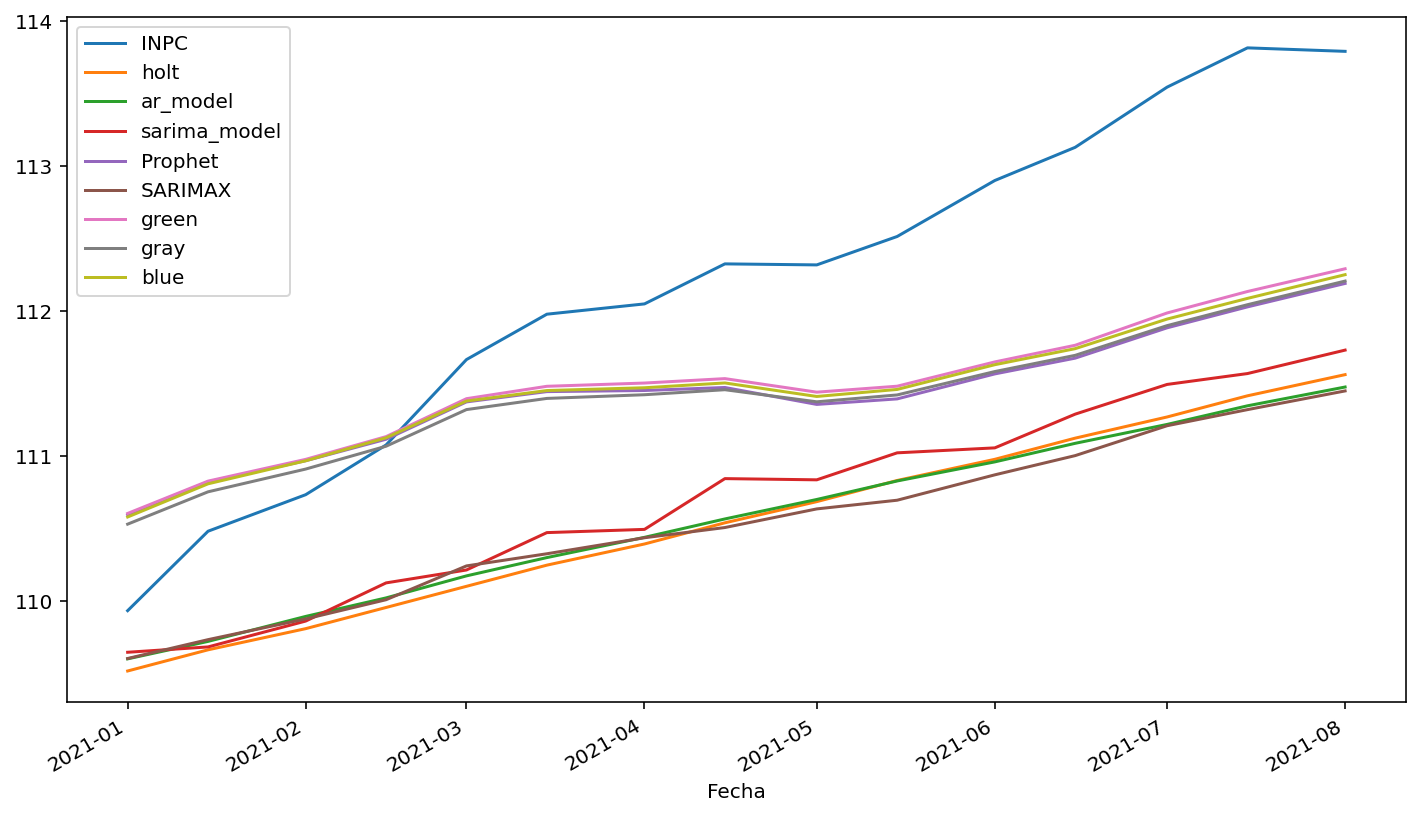

In [51]:
df_complete = df.INPC.append(df_2021.INPC)
df_2021.plot()

In [52]:
df.iloc[-24:-7].to_csv('datos_2020.csv')